In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
#pd.set_option('display.max_rows', None) 

In [2]:
df=pd.read_csv('./cleaned_food.csv',index_col=None)


In [3]:
df.shape ## 36844 lignes et 12 colonnes


(36844, 11)

In [4]:
df.head()

,product_name,categories,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Lion Peanut x2,unknown,1.0,0.0,e,1883.0,12.50000,57.500,2.50,0.09652,22.000000
1,Pack de 2 Twix,unknown,3.4,0.4,unknown,1481.0,6.89119,22.062,6.25,0.63680,12.840248
2,Praliné Amande Et Noisette,unknown,0.0,0.2,d,2406.0,2.90000,50.300,9.50,0.00300,14.000000
3,"Pepsi, Nouveau goût !",Sodas au cola,2.0,0.0,e,177.0,0.00000,10.400,0.00,0.02540,13.000000
4,Tarte Poireaux Et Lardons,unknown,4.8,0.4,d,1079.0,11.00000,1.000,7.50,0.80000,15.000000


In [5]:
df.columns.tolist()

['product_name',
 'categories',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'nutrition_grade_fr',
 'energy_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

__Variables quantitatives:__
  <br/><u>Variables quantitatives continues</u>
  - nutrition-score-fr_100g: score nutritionnel  pour une portion de 100g du produitn
  - energy_100g, proteins_100g, sugars_100g, saturated-fat_100g, salt_100g: valeurs nutritionelles pour une portion de 100g du produit ou de l'aliment enregistré
  <br/><u>Variables quantitatives discrètes</u>
  - additives_n: le nombre d'additifs présent dans le produit
__Variables qualitatives:__

<u>Variables qualitatives nominales:</u>
- product_name: Nom du produit 
- brands: Marque du produit 
- ingredients_from_palm_oil_n: présence ou non d'huile de palme dans le produit ou dans préparation


<u>Variables qualitatives ordinales:</u>
- nutriscore_grade: impact environnemental du produit allant de A à E

 

In [6]:
df.isnull().sum()/len(df)

product_name                   0.0
categories                     0.0
additives_n                    0.0
ingredients_from_palm_oil_n    0.0
nutrition_grade_fr             0.0
energy_100g                    0.0
saturated-fat_100g             0.0
sugars_100g                    0.0
proteins_100g                  0.0
salt_100g                      0.0
nutrition-score-fr_100g        0.0
dtype: float64

## 1 - Analyse univariée

In [6]:
## analyse univariée
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,additives_n,ingredients_from_palm_oil_n
count,126940.000000,126940.000000,126940.000000,126940.000000,126940.000000,126940.000000,126940.000000,126940.000000,126940.000000,126940.000000,126940.000000
mean,1073.644235,11.319481,4.447746,33.048637,16.768007,1.648430,5.828840,0.826336,10.217589,2.358704,0.030436
std,719.949968,11.980265,5.474661,27.741334,18.772504,1.935867,5.792857,0.820232,7.704703,2.621087,0.163843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,410.000000,0.200000,0.187267,7.330000,2.000000,0.000000,0.800000,0.100000,3.000000,0.200000,0.000000
50%,1046.000000,7.500000,2.170000,24.800000,8.330000,1.020000,4.410000,0.635000,10.000000,2.000000,0.000000
75%,1674.000000,20.000000,6.900000,58.000000,28.000000,2.580000,8.300000,1.300000,16.000000,3.000000,0.000000
max,3703.000000,81.533570,29.765893,131.323478,72.400000,8.750000,24.000000,3.660000,37.000000,31.000000,2.000000


La variable énergie a une échelle de valeurs bien plus importante, on note aussi ,au regard des écart-types, que les dispersions sont très différentes

## Analyse des variables quantitatives

###    Analyse de la variable quantitative discrète nombre d'additifs (additives_n)

In [7]:

sns.barplot(x = 'class', y = 'fare', data = df['additives_n'])

ValueError: Could not interpret input 'class'

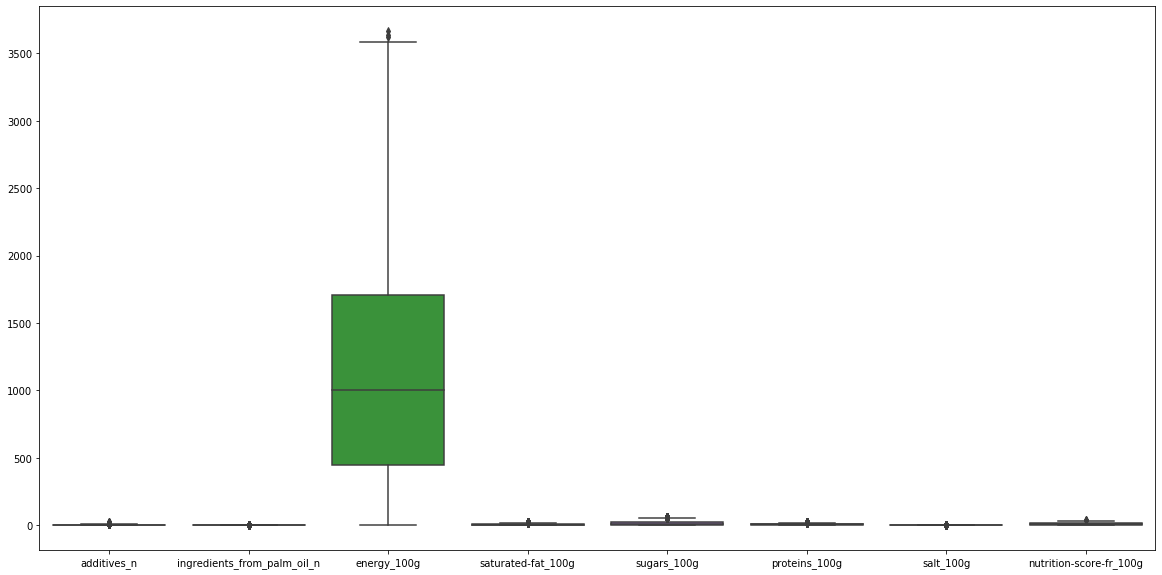

In [11]:
## boxplot
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,10


 
g=sns.boxplot(data=df)
#g.set_yscale("log")

# 2 - Analyse multivariée

In [14]:
## filtrage des variables quantitatives pour l'analyse en composantes principales
numeric_columns=df.select_dtypes(exclude=['object']).columns.tolist()
pca_cols=[i for i in numeric_columns if  i!='nutrition-score-fr_100g']

pca_cols

['additives_n',
 'ingredients_from_palm_oil_n',
 'energy_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g']

In [39]:
df[pca_cols].corr()
## on note une faible corrélation entre les variables

,additives_n,ingredients_from_palm_oil_n,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g
additives_n,1.000000,0.232017,0.065690,0.014626,0.082200,-0.046803,0.054106
ingredients_from_palm_oil_n,0.232017,1.000000,0.256517,0.201056,0.184470,-0.006194,-0.012101
energy_100g,0.065690,0.256517,1.000000,0.610550,0.433433,0.260753,0.120373
saturated-fat_100g,0.014626,0.201056,0.610550,1.000000,0.284793,0.255047,0.060372
sugars_100g,0.082200,0.184470,0.433433,0.284793,1.000000,-0.196138,-0.383189
proteins_100g,-0.046803,-0.006194,0.260753,0.255047,-0.196138,1.000000,0.514620
salt_100g,0.054106,-0.012101,0.120373,0.060372,-0.383189,0.514620,1.000000


In [15]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df,figsize=(25,25));

In [26]:

data=df.loc[:, pca_cols].values
data

array([[1.0000e+00, 0.0000e+00, 1.8830e+03, ..., 5.7500e+01, 2.5000e+00,
        9.6520e-02],
       [3.4000e+00, 4.0000e-01, 1.4810e+03, ..., 2.2062e+01, 6.2500e+00,
        6.3680e-01],
       [0.0000e+00, 2.0000e-01, 2.4060e+03, ..., 5.0300e+01, 9.5000e+00,
        3.0000e-03],
       ...,
       [2.2000e+00, 2.0000e-01, 1.0840e+03, ..., 1.0500e+01, 8.7000e+00,
        2.9000e-01],
       [1.2000e+00, 0.0000e+00, 2.4060e+03, ..., 3.8900e+00, 2.1220e+01,
        1.0000e-01],
       [0.0000e+00, 0.0000e+00, 2.1000e+01, ..., 5.0000e-01, 5.0000e-01,
        2.5400e-02]])

In [41]:
## création d'un objet pipeline de normalisation et de l'acp
pipeline1=Pipeline([
    ('standard_scaler',StandardScaler()),
    ('pca',PCA(0.90)) ## on espère 90% de la variance
])

In [42]:
## exécution du pipeline
pipeline1.fit_transform(data)

array([[ 2.01019922, -2.14665283, -1.56818538, -0.68535979,  0.46045187,
         0.30754514],
       [ 1.11898758, -0.55981616,  0.68488867,  0.45470497,  0.11394929,
        -0.04427759],
       [ 1.80507169, -1.42912589, -1.28830978,  0.18994294,  1.90574305,
        -0.31916932],
       ...,
       [ 0.75940164, -0.09319974, -0.19935318,  0.33114424, -0.96578876,
        -0.75465603],
       [ 1.07531521,  1.32858081, -0.99848981, -0.12007611,  0.62636945,
        -1.73000714],
       [-2.23394357, -0.86561109, -0.46039942,  0.7078343 , -0.52496144,
        -0.12015378]])

pca==== PCA(n_components=0.9)


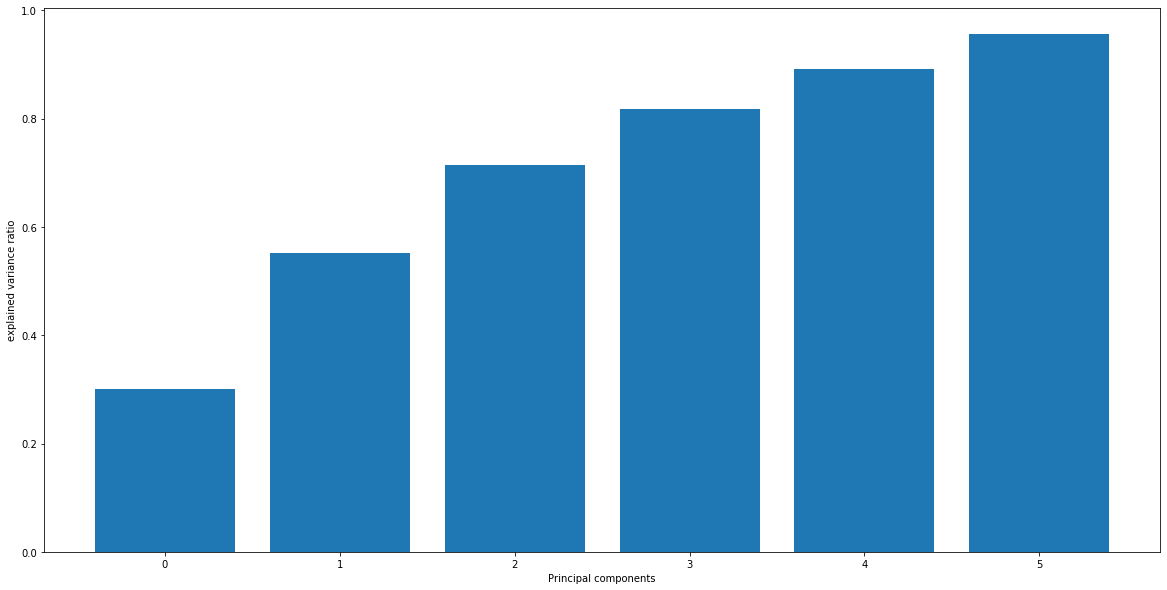

In [43]:
## visualisation des composantes principales
pca=pipeline1[1]
print('pca====',pca)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Principal components')
plt.ylabel('explained variance ratio')

plt.xticks(range(pca.n_components_))
plt.show()

In [37]:


## la dimension intrinsèque de nos données est égale à 3
## par conséquent nos données peuvent être réduite à 3 voir 4 dimensions  au lieu de 10
## tout en gardant 70% de la variabilité
pca.explained_variance_ratio_.cumsum()

array([0.30017215, 0.55207725, 0.71427013, 0.81877934, 0.89188375,
       0.95633579])